## Goals:

Understand whether the cropping issue is a results of variation between the recordings or whether it has to do with our crop parameters

- Plot vide with cropping
- arr of first frame for each video V
- reduce over n dim V
- Plot avg, stdV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from complete_pipeline.utils import read_first_frame
import napari
import os
from pathlib import Path
import einops, einsum

In [7]:
# get path of the data dir
path = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting"
data_dir = Path(path)

# collect the path of each .avi video
video_paths = np.stack([read_first_frame(x) for x in data_dir.glob('**/*.avi')])

In [33]:
arena_avg = einops.reduce(video_paths.astype(float), 'frames h w c -> h w ', 'mean')

arena_std = einops.reduce(video_paths.astype(float), 'frames h w c -> h w ', np.std)

arena_std_norm = arena_std / arena_avg

In [19]:
%matplotlib widget

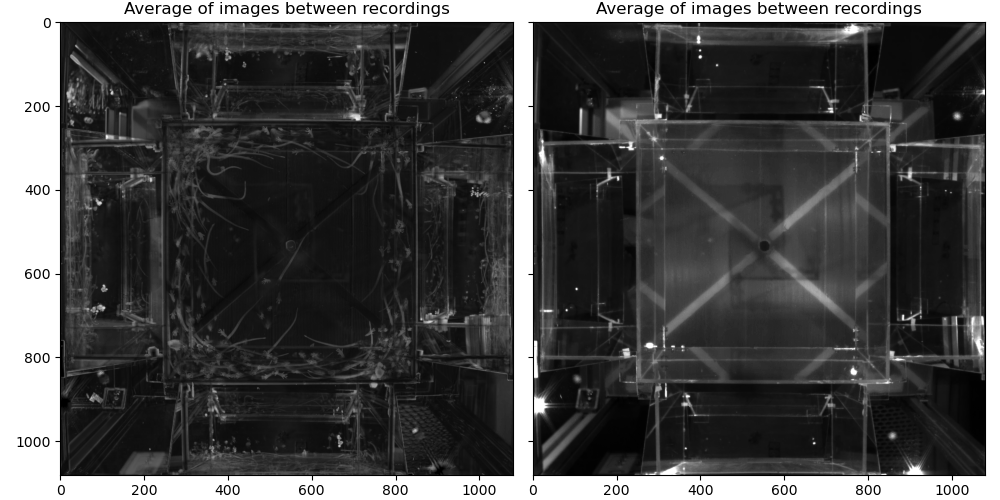

In [34]:
# plot the average of  images between recordings 
f, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

#plt.subplot(1, 2, 1)
ax[0].imshow(arena_std_norm, cmap='gray', aspect='equal')
ax[0].set_title('Average of images between recordings')

#plt.subplot(1, 2, 2)
ax[1].imshow(video_paths[0].mean(axis=2), cmap='gray', aspect='equal')
ax[1].set_title('First recording')



plt.tight_layout()
#plt.colorbar()
plt.title('Average of images between recordings')
plt.show()

## Goals pt2

1. Make the rectangle start from the botton of the image and not from the central

In [35]:
corner_sw = (860, 250)
corner_nw = (240, 250)
corner_ne = (240, 850)
corner_se = (860, 850)
def_side = 220
padding_left_right = 2
width_padding_tb = 4
default_rectangles = {
    "central": [
        (corner_nw[0] - padding_left_right, corner_nw[1] - width_padding_tb),
        (corner_ne[0] - padding_left_right, corner_ne[1] + width_padding_tb),
        (corner_se[0] + padding_left_right, corner_se[1] + width_padding_tb),
        (corner_sw[0] + padding_left_right, corner_sw[1] - width_padding_tb),
    ],
    "mirror-top": [
        (
            corner_nw[0] - def_side - padding_left_right,
            corner_nw[1] - width_padding_tb,
        ),
        (
            corner_ne[0] - def_side + padding_left_right,
            corner_ne[1] - width_padding_tb,
        ),
        (corner_ne[0] + padding_left_right, corner_ne[1] + width_padding_tb),
        (corner_nw[0] - padding_left_right, corner_nw[1] + width_padding_tb),
    ],
    "mirror-bottom": [
        (corner_sw[0] - padding_left_right, corner_sw[1] - width_padding_tb),
        (corner_se[0] - padding_left_right, corner_se[1] + width_padding_tb),
        (
            corner_se[0] + def_side + padding_left_right,
            corner_se[1] + width_padding_tb,
        ),
        (
            corner_sw[0] + def_side + padding_left_right,
            corner_sw[1] - width_padding_tb,
        ),
    ],
    "mirror-left": [
        (
            corner_nw[0] - padding_left_right,
            corner_nw[1] - def_side - padding_left_right,
        ),
        (corner_nw[0] - padding_left_right, corner_nw[1] + padding_left_right),
        (corner_sw[0] + padding_left_right, corner_sw[1] + padding_left_right),
        (
            corner_sw[0] + padding_left_right,
            corner_sw[1] - def_side - padding_left_right,
        ),
    ],
    "mirror-right": [
        (corner_ne[0] - padding_left_right, corner_ne[1] - padding_left_right),
        (
            corner_ne[0] - padding_left_right,
            corner_ne[1] + def_side + padding_left_right,
        ),
        (
            corner_se[0] + padding_left_right,
            corner_se[1] + def_side + padding_left_right,
        ),
        (corner_se[0] + padding_left_right, corner_se[1] - padding_left_right),
    ],
}